# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [4]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [5]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [6]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

#### Answer:  There are 400 rows (aka observations) of data.  All rows have "admit" data.  Prestige is missing one data point; GRE and GPA are each missing 2 data points.

#### Question 2. Create a summary table

In [7]:
#function

In [8]:
df_raw.describe()

/Users/jameskanatas/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE should have a larger STD than GPA because the range of GRE scores is much larger than the range of scores for GPA.  GRE ranges from 220 to 800; GPA ranges from 2.26 to 4.00.

#### Question 4. Drop data points with missing data


In [9]:
df_raw = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: 


In [10]:
df_raw.describe()

# ANSWER: Yes confirmed below.  I ran describe.df_raw and it's showing only 397 observations now.

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 6. Create box plots for GRE and GPA

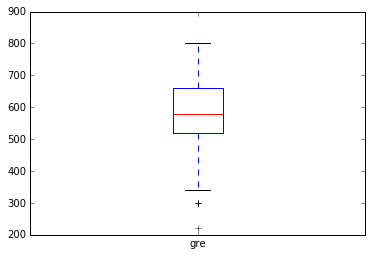

In [11]:
#boxplot 1

df_raw['gre'].plot(kind='box', ylim=(200,900))

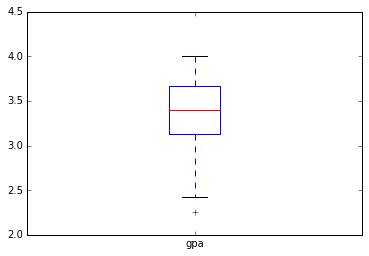

In [12]:
#boxplot 2 

df_raw['gpa'].plot(kind='box', ylim=(2.00,4.50))

In [13]:
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


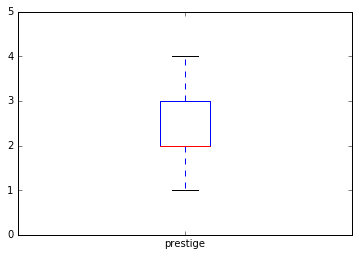

In [14]:
# box plot for prestige
df_raw['prestige'].plot(kind='box', ylim=(0.0,5.0))

#### Question 7. What do this plots show?

Answer: 
These plots show the distribution of the observations.  The red line in the middle shows the median (50% of data falls above and below the median).  The solid blue horizontal lines show the 25% and 75% marks (25% and 75% of the data fall below these numbers, respectively).  The solid black horizontal lines show the where nearly all (usually ~99%) of data fall between.

#### Question 8. Describe each distribution 

In [15]:
# plot the distribution of each variable 

#ANSWER:
# Box plots are above


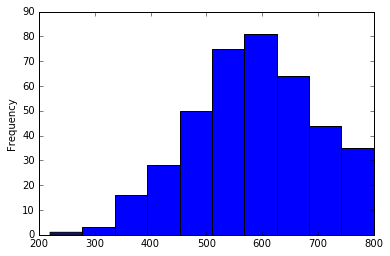

In [17]:
df_raw['gre'].plot(kind='hist')

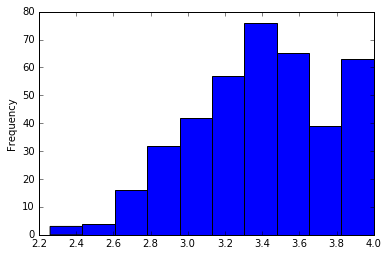

In [19]:
df_raw['gpa'].plot(kind='hist')

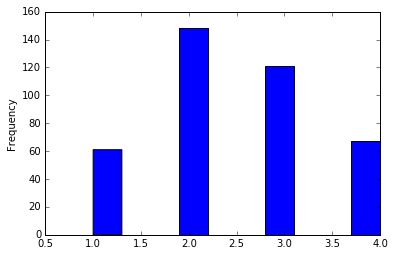

In [20]:
df_raw['prestige'].plot(kind='hist')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Looking at the historgram plots above, the data does not appear to be normally distributed. GRE appears left-skewed, GPA appears left-skewed along with an odd dip around 3.7/3.8, and Prestige appears slightly right-skewed.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: We should check for colinearity among the variables.  Also we need to convert prestige to dummy variables with get_dummies.

#### Question 11. Which of our variables are potentially colinear? 

In [59]:
# create a correlation matrix for the data
#ANSWER: I would not be surprised if GRE and GPA are colinear;
# hardworking students may earn higher GPAs and get higher GRE scores.
# Also, within Prestige, their is colinearity: e.g. if a student's undergraduate's alma mater's
# prestige score is not 1, 2, or 3, then it must be 4.  Therefore there "4" can be fully
# expressed a function of 1, 2, and 3.

df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: I did not find strong colinearity between gre, gpa, and prestige.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:

The next step is to create a regression model (with the ordinary least squares method) for predicting outcomes.  We will use all three variables (gre, gpa, prestige), although we will use the pandas.get_dummies function to restate prestige as 0s and 1s.

Next we will generate the regression.  In examining the output of the regression, and judging the strength of the linear relationship betwene the variables and the outcome, we will look for a high R-squared, a p-value between 0.05, a skew approximately near zero, a low kurtosis, and a fairly consistent variance for the residuals across the data set (i.e. checking for heteroskedasticity).  Based on these output metrics, we will determine the strength of the linear relatiuonship.

It is also possible that there is a relationship between then variables and the outcome, but that relationship is not linear.  At that point, we would explore ways to transpose the raw data (e.g. taking the log of the variables and then generating the regression).

#### Question 14. What is your hypothesis? 

Answer: The null hypothesis is that there is no linear relationship between admission and gre, gpa, or undergraduate prestige.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data